In [523]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go # for plots
import plotly.express as px #for plots
import matplotlib.pyplot as plt # for visualizations and plots
import missingno as msno # for plotting missing data
plt.style.use('default')
#sns.set(color_codes=True)
%matplotlib inline
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [524]:
df = pd.read_csv('dataset/diabetes_original.csv')
features = df.iloc[:,:-1]
label = df.iloc[:, -1]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [501]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [502]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


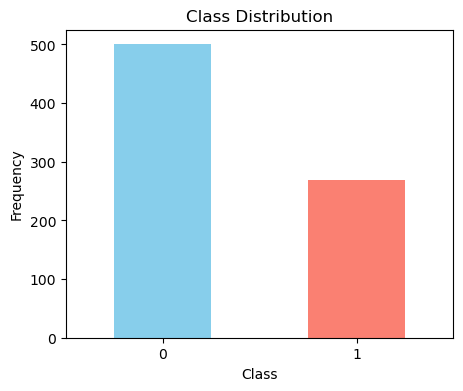

In [503]:
# Check class distribution
plt.figure(figsize=(5, 4))
label.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

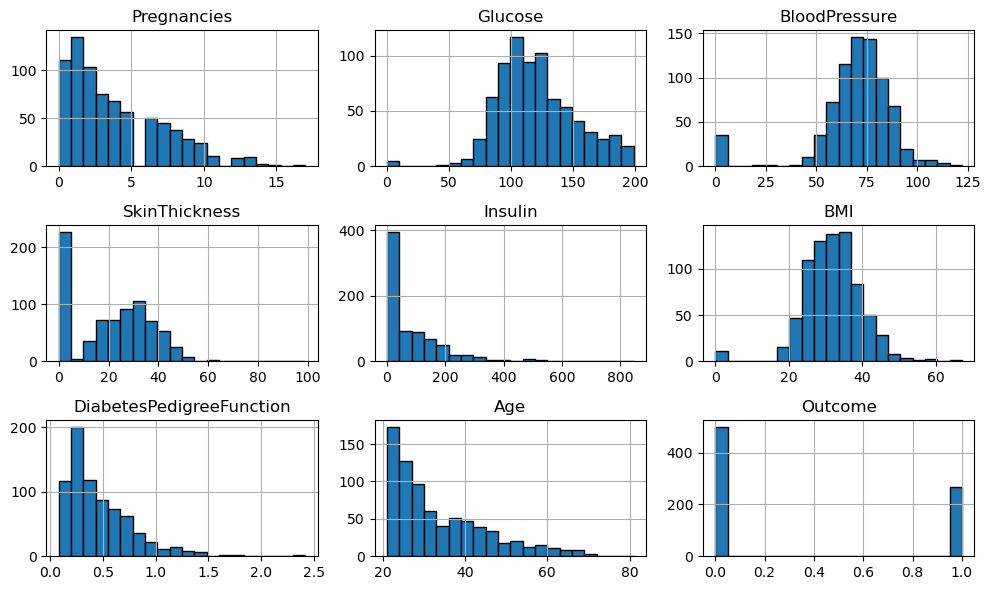

In [506]:
# Plot histograms for all features
df.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [526]:
print('Number of rows with 0 values in each variable')
for col in df.columns:
    zero_value = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(zero_value))

Number of rows with 0 values in each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [343]:
# remove 0 values from variables with least 0 values excluding pregnancies and outcome
drop_glu = df.index[df.Glucose == 0].tolist()
drop_BP = df.index[df.BloodPressure == 0].tolist()
drop_BMI = df.index[df.BMI == 0].tolist()
drop_index = drop_glu + drop_BP + drop_BMI
df_diab = df.drop(df.index[drop_index])

In [347]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [344]:
df_diab = df.copy()
df_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Inspect data per variables

In [345]:
# Split to 0 and 1 outcome
dia1 = df_diab[df_diab.Outcome == 1]
dia0 = df_diab[df_diab.Outcome == 0]

In [358]:
print(dia1.shape)
print(dia0.shape)


(268, 9)
(500, 9)


Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

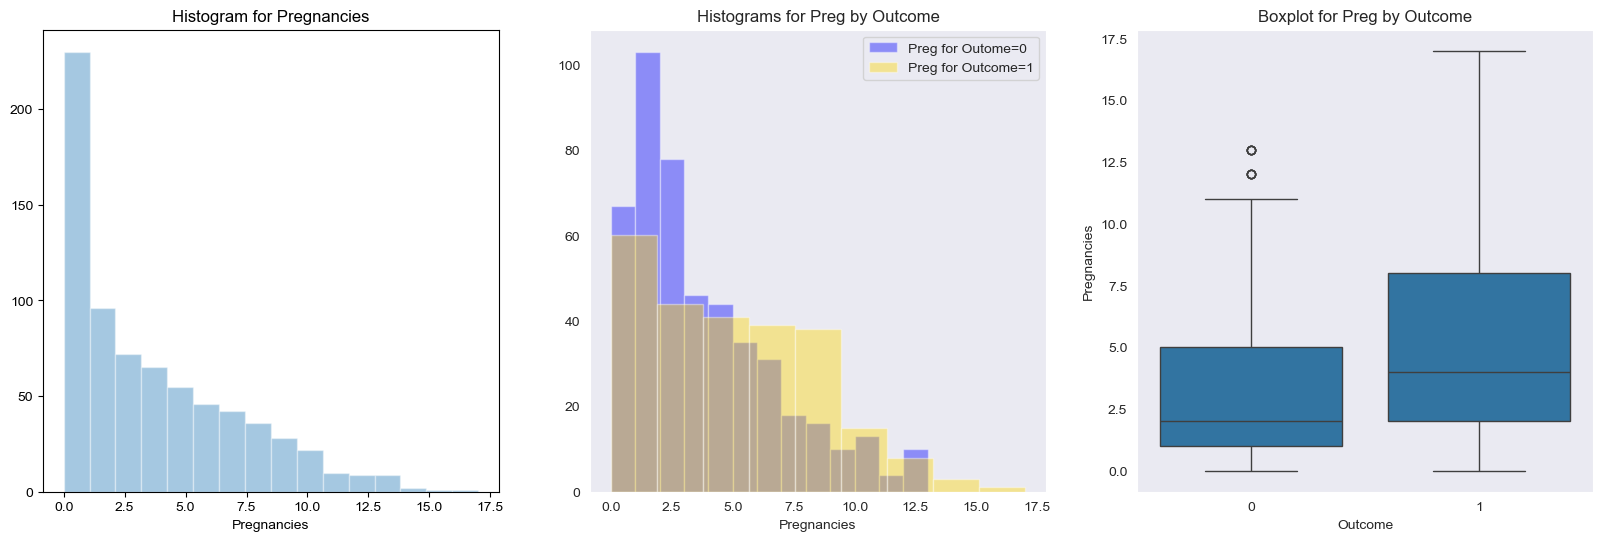

In [11]:
## Inspect variable pregnancies
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(df_diab.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(dia1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df_diab.Outcome,y=df_diab.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

Text(0.5, 1.0, 'Boxplot for GLucose by Outcome')

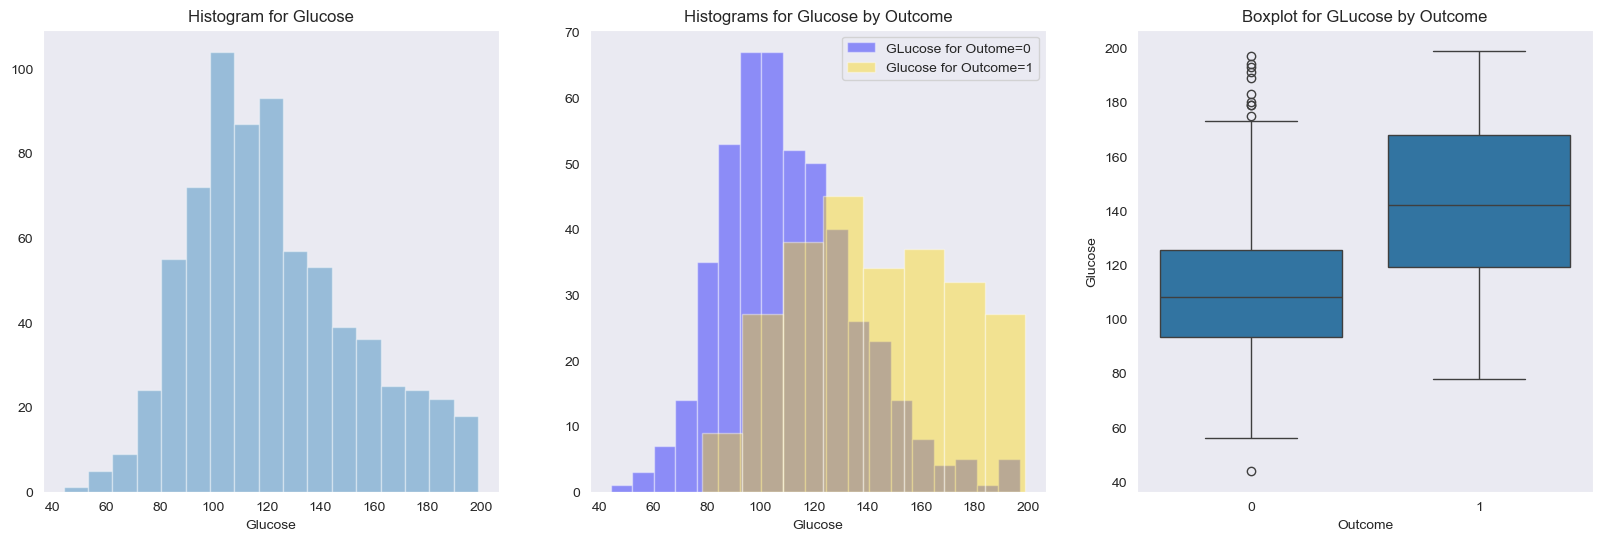

In [124]:
## Inspect variable glucose
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Glucose")
sns.distplot(df_diab.Glucose,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Glucose,kde=False,color="Blue", label="GLucose for Outome=0")
sns.distplot(dia1.Glucose,kde=False,color = "Gold", label = "Glucose for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df_diab.Outcome,y=df_diab.Glucose)
plt.title("Boxplot for GLucose by Outcome")

Text(0.5, 1.0, 'Boxplot for BloodPressure by Outcome')

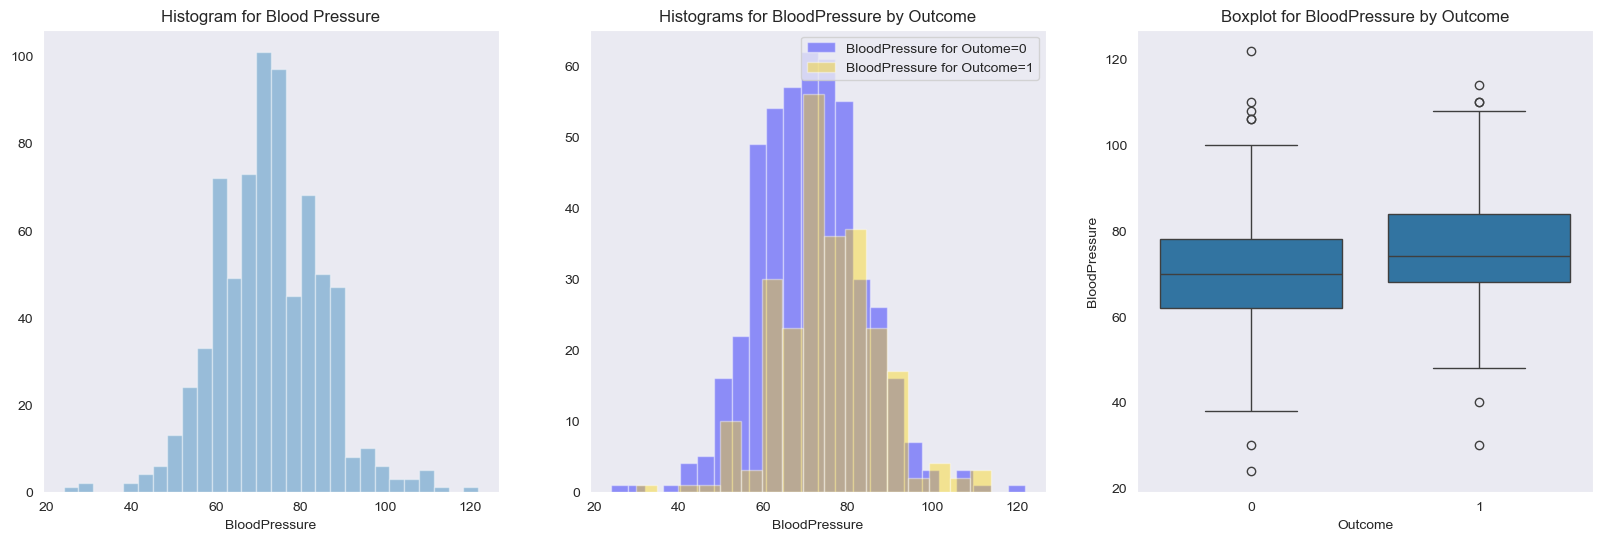

In [125]:
## Inspect variable blood pressure
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Blood Pressure")
sns.distplot(df_diab.BloodPressure,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.BloodPressure,kde=False,color="Blue", label="BloodPressure for Outome=0")
sns.distplot(dia1.BloodPressure,kde=False,color = "Gold", label = "BloodPressure for Outcome=1")
plt.title("Histograms for BloodPressure by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df_diab.Outcome,y=df_diab.BloodPressure)
plt.title("Boxplot for BloodPressure by Outcome")

Text(0.5, 1.0, 'Boxplot for SkinThickness by Outcome')

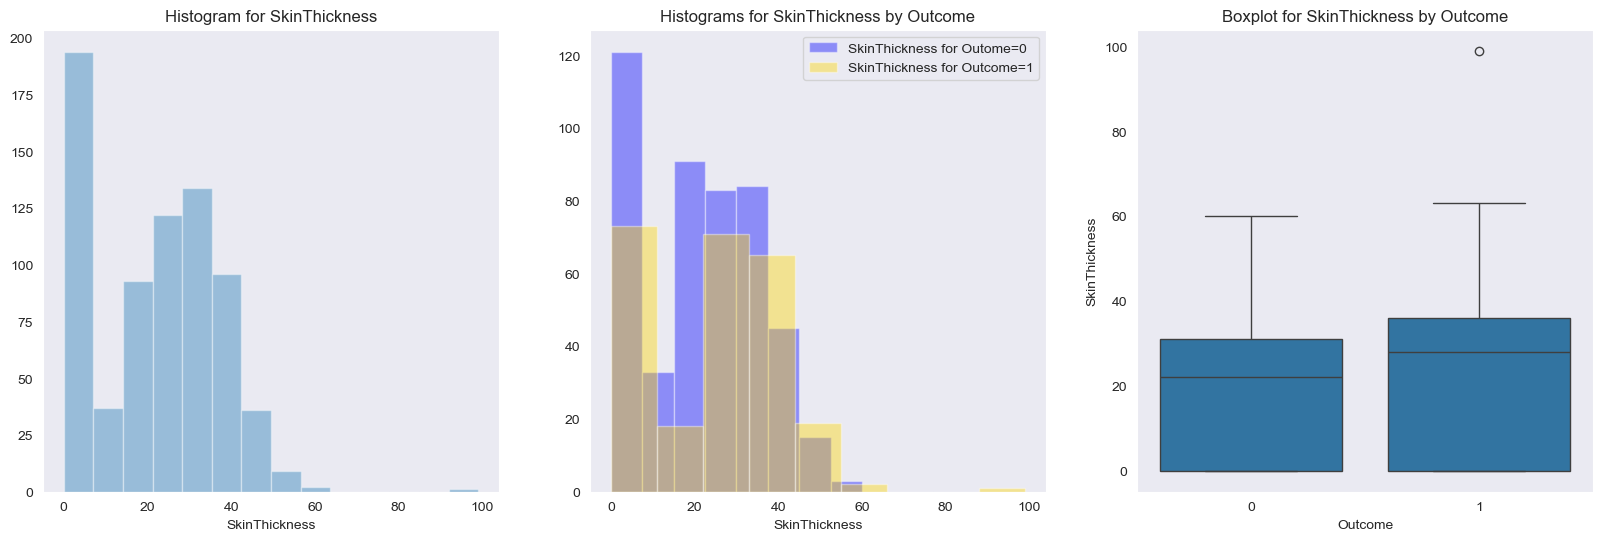

In [126]:
## Inspect variable skin thickness
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for SkinThickness")
sns.distplot(df_diab.SkinThickness,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.SkinThickness,kde=False,color="Blue", label="SkinThickness for Outome=0")
sns.distplot(dia1.SkinThickness,kde=False,color = "Gold", label = "SkinThickness for Outcome=1")
plt.title("Histograms for SkinThickness by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df_diab.Outcome,y=df_diab.SkinThickness)
plt.title("Boxplot for SkinThickness by Outcome")

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

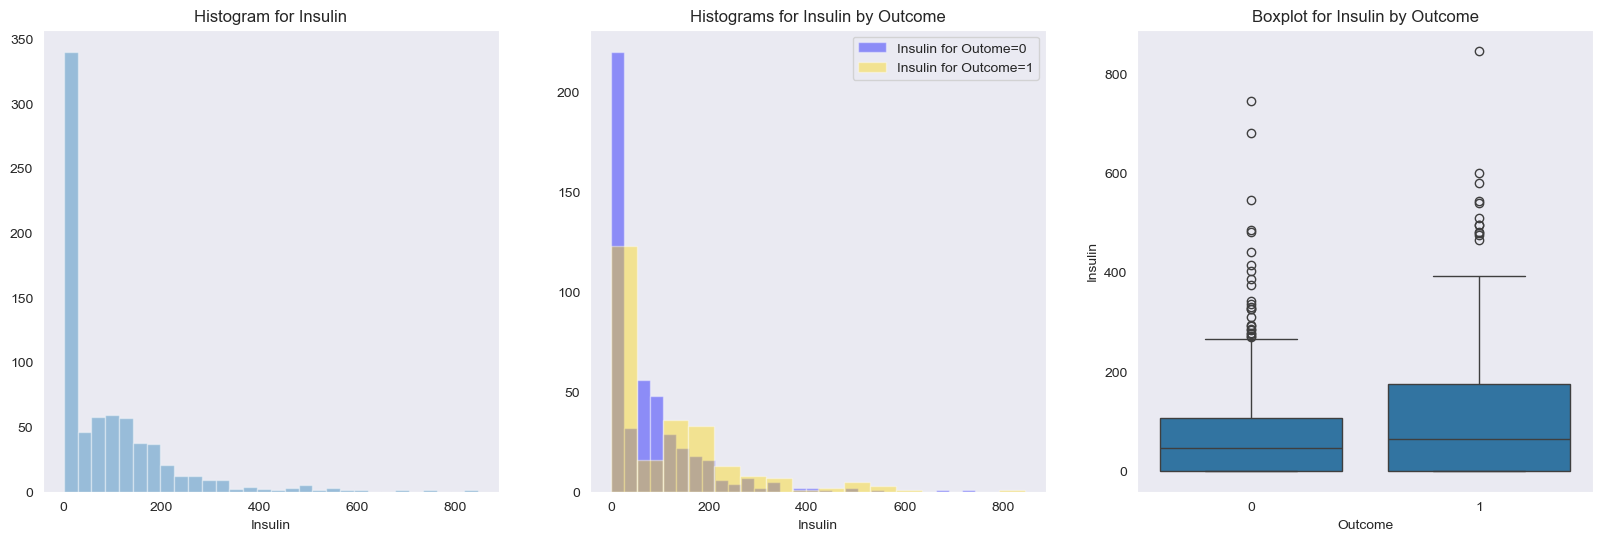

In [127]:
## Inspect variable Insulin
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Insulin")
sns.distplot(df_diab.Insulin,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Insulin,kde=False,color="Blue", label="Insulin for Outome=0")
sns.distplot(dia1.Insulin,kde=False,color = "Gold", label = "Insulin for Outcome=1")
plt.title("Histograms for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df_diab.Outcome,y=df_diab.Insulin)
plt.title("Boxplot for Insulin by Outcome")

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

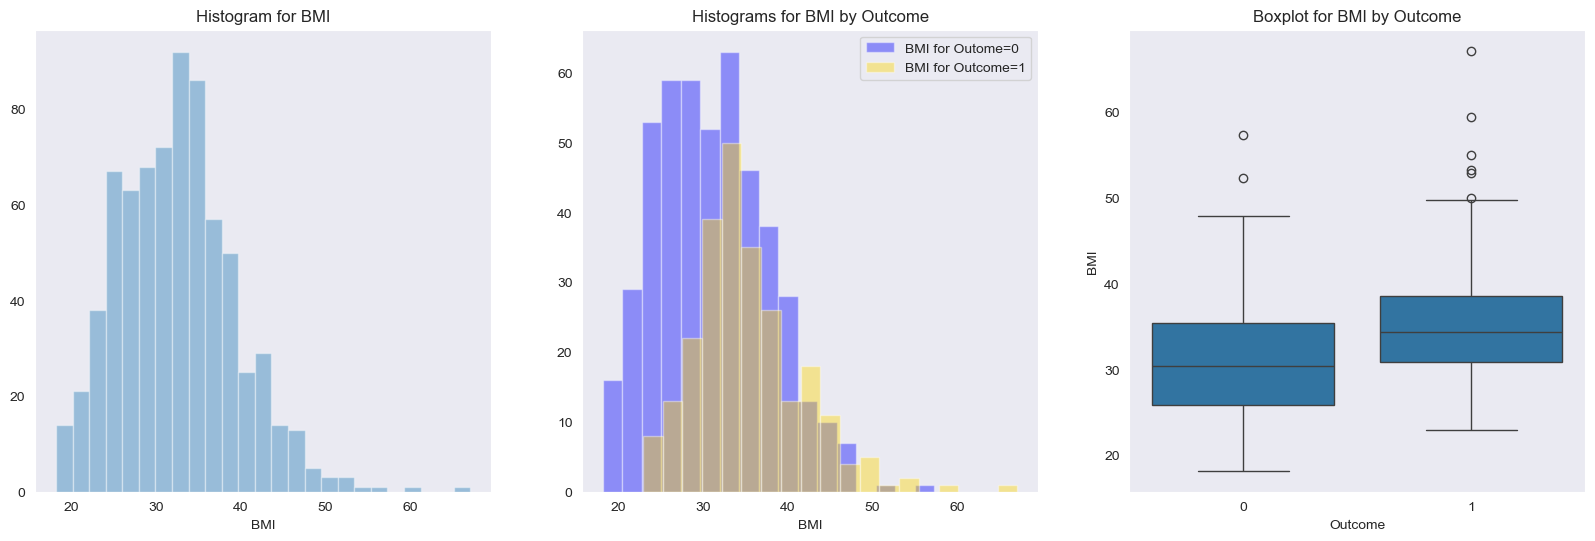

In [128]:
## Inspect variable BMI
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BMI")
sns.distplot(df_diab.BMI,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.BMI,kde=False,color="Blue", label="BMI for Outome=0")
sns.distplot(dia1.BMI,kde=False,color = "Gold", label = "BMI for Outcome=1")
plt.title("Histograms for BMI by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df_diab.Outcome,y=df_diab.BMI)
plt.title("Boxplot for BMI by Outcome")

Text(0.5, 1.0, 'Boxplot for Diabetes Pedigree Function by Outcome')

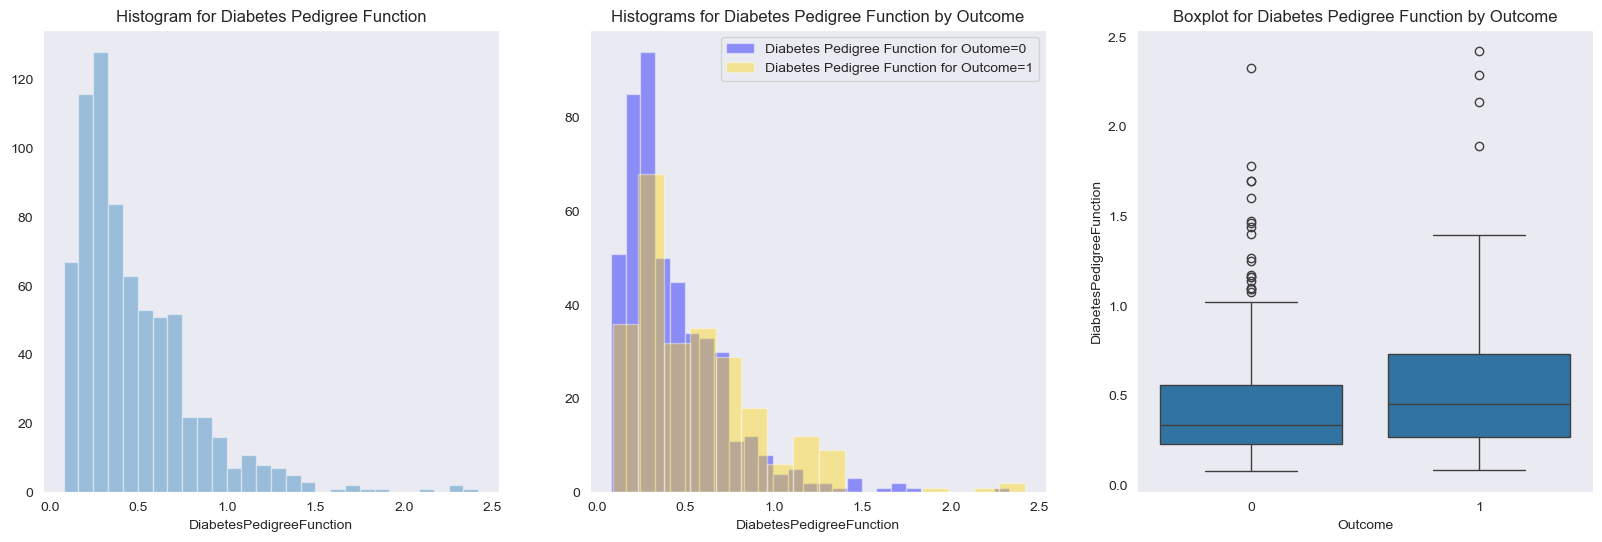

In [129]:
## Inspect variable Diabetes Pedigree Function
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Diabetes Pedigree Function")
sns.distplot(df_diab.DiabetesPedigreeFunction,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction,kde=False,color="Blue", label="Diabetes Pedigree Function for Outome=0")
sns.distplot(dia1.DiabetesPedigreeFunction,kde=False,color = "Gold", label = "Diabetes Pedigree Function for Outcome=1")
plt.title("Histograms for Diabetes Pedigree Function by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df_diab.Outcome,y=df_diab.DiabetesPedigreeFunction)
plt.title("Boxplot for Diabetes Pedigree Function by Outcome")

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

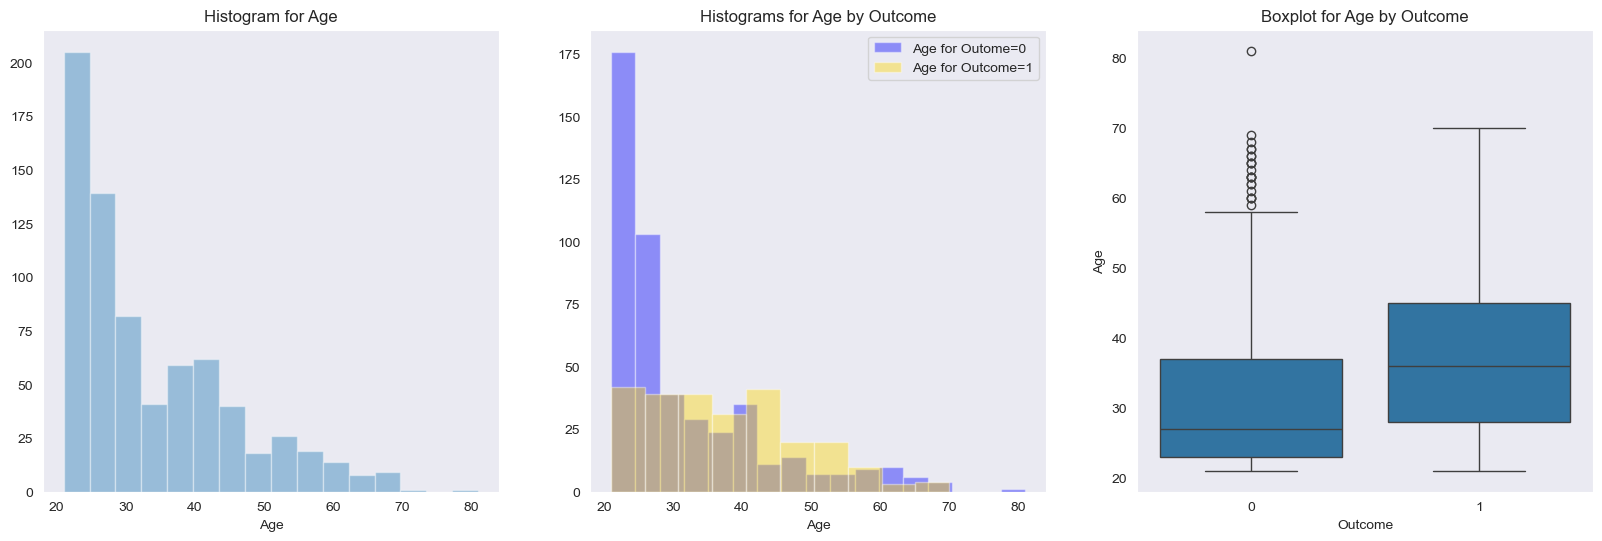

In [130]:
## Inspect variable Age
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.distplot(df_diab.Age,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False,color="Blue", label="Age for Outome=0")
sns.distplot(dia1.Age,kde=False,color = "Gold", label = "Age for Outcome=1")
plt.title("Histograms for Age by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df_diab.Outcome,y=df_diab.Age)
plt.title("Boxplot for Age by Outcome")

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

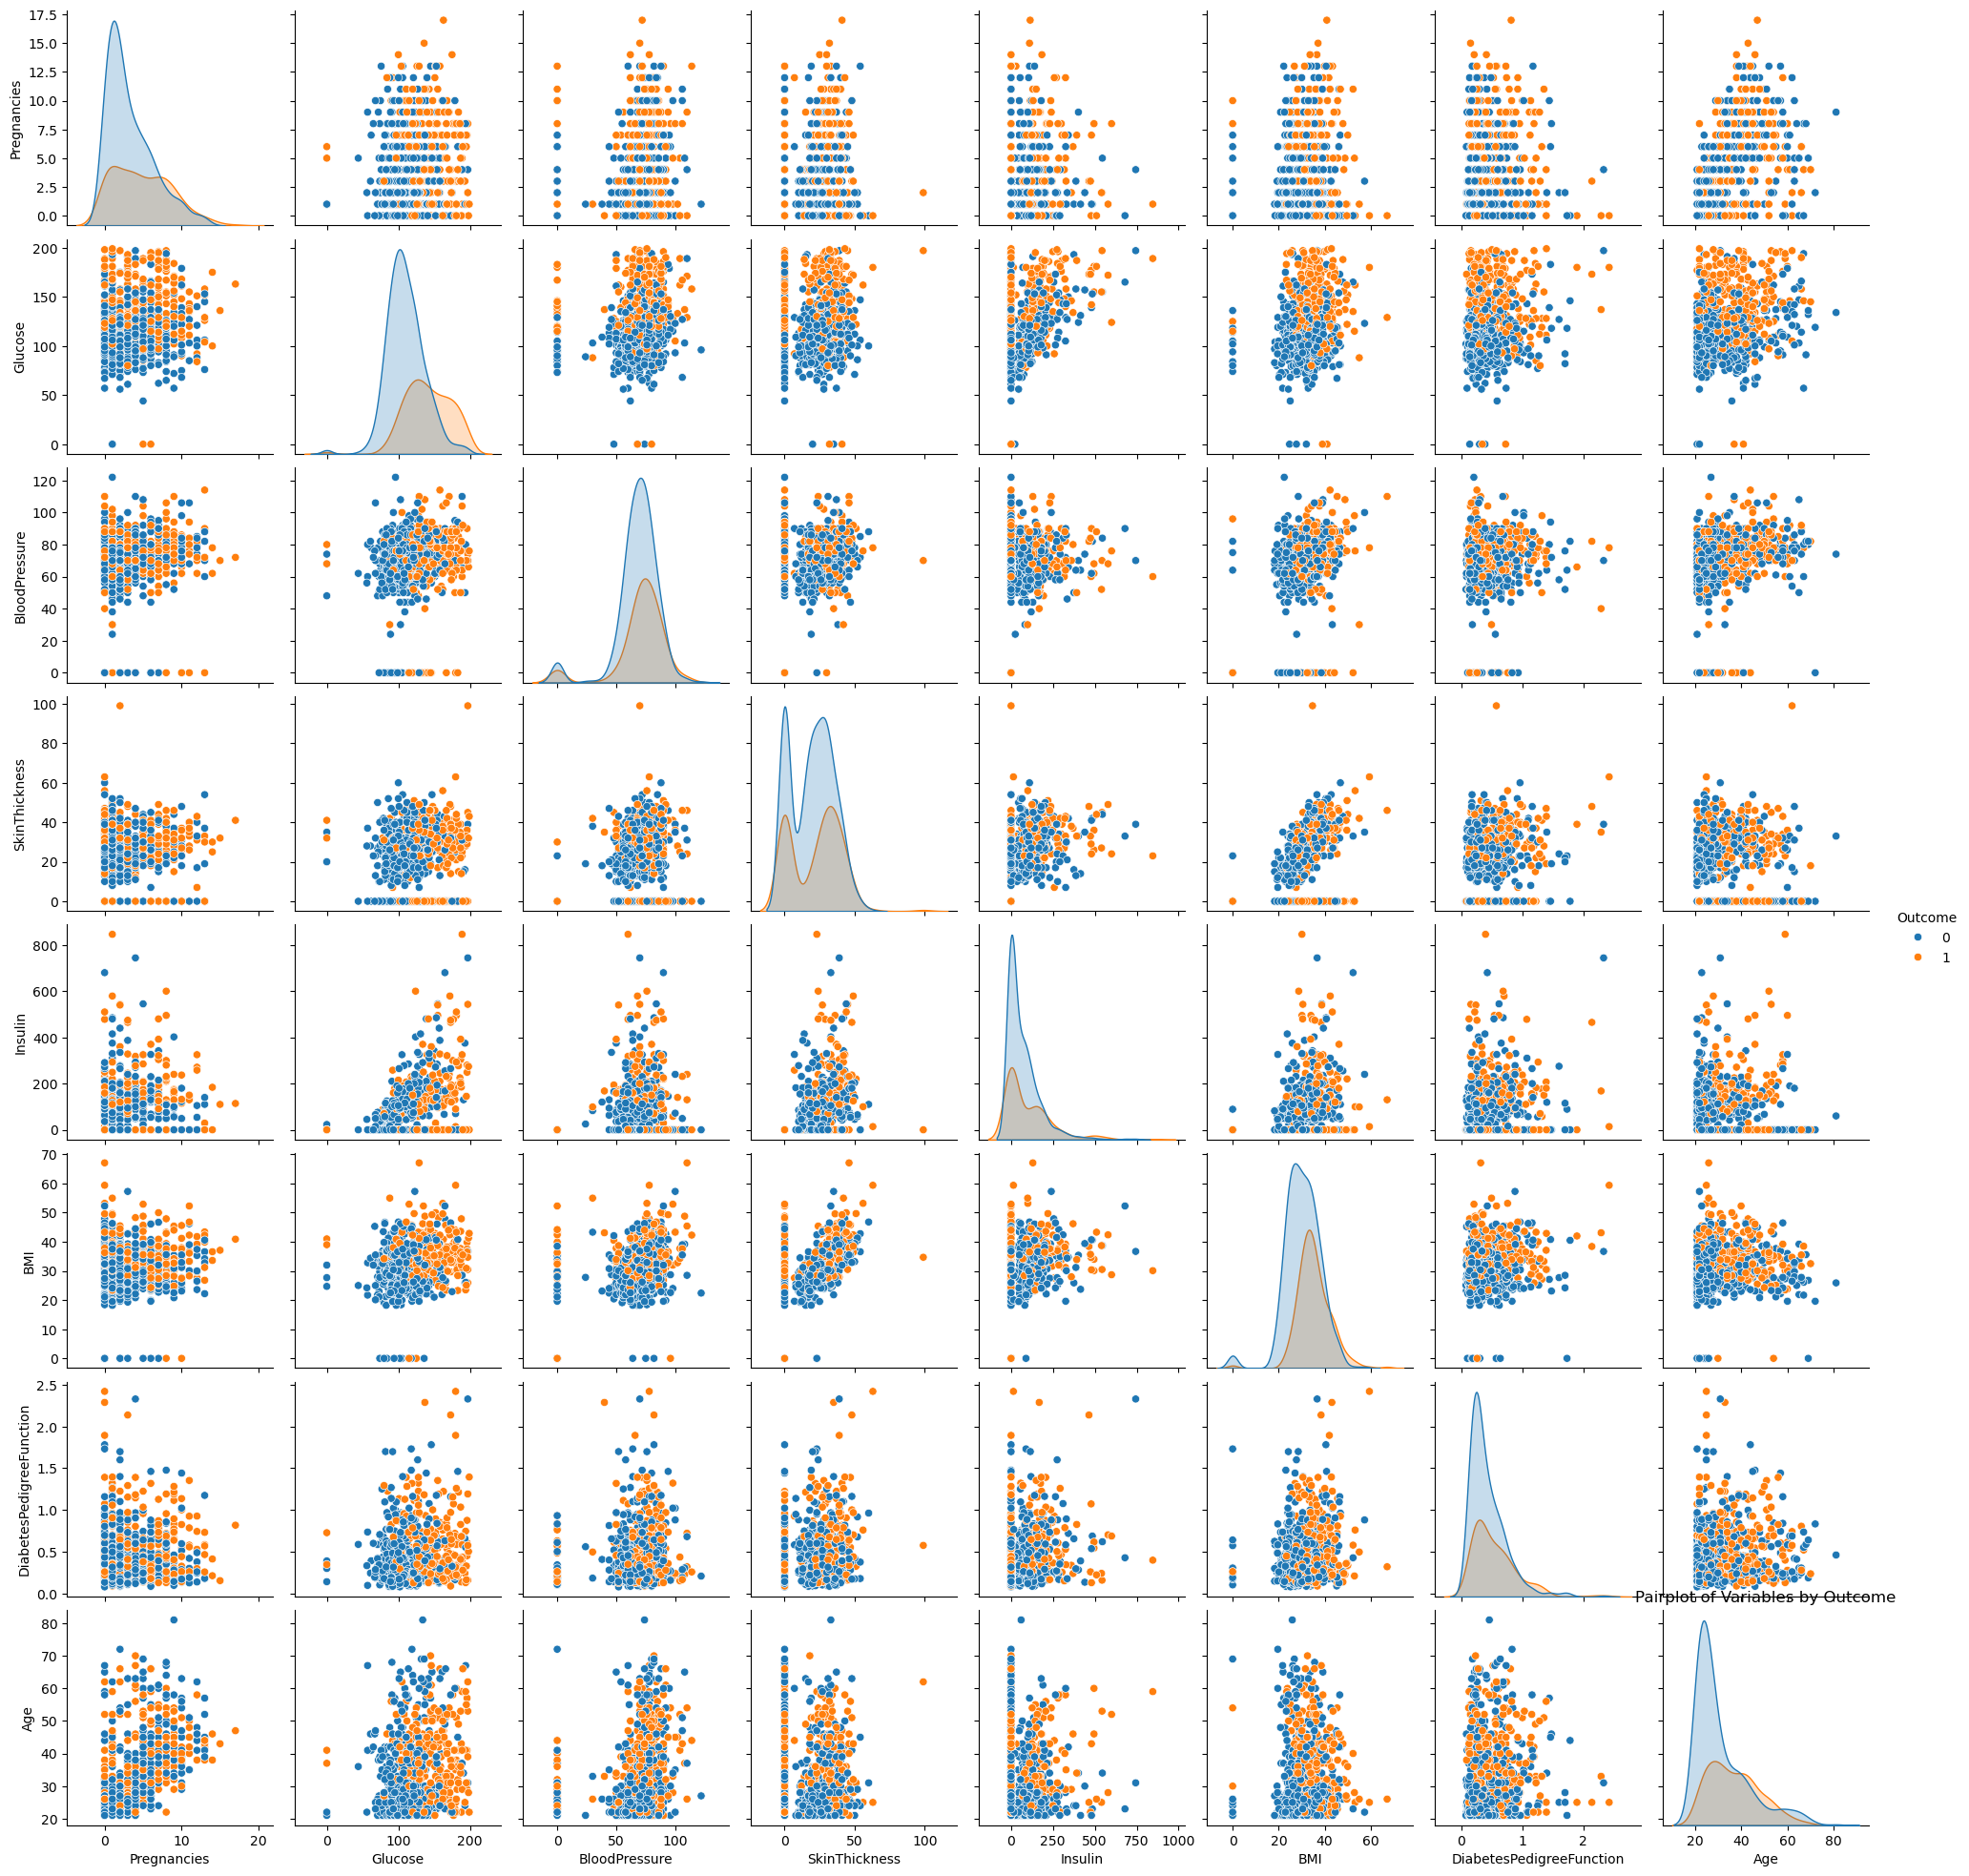

In [519]:
# Correlation between variables
sns.pairplot(df_diab, vars=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"], hue = "Outcome")
plt.title("Pairplot of Variables by Outcome")

In [522]:
# Data cleaning by removing outlier (outside 5-95 quantile) with the value at 5th and 95th quantile themselves
def replace_outliers(df, excluded_column='age', lower_percentile=5, upper_percentile=95):
    # Loop through each numeric column in the dataframe, except the excluded one
    for col in df.select_dtypes(include=s'number').columns:
        if col != excluded_column:  # Skip the 'age' column
            # Calculate the 5th and 95th percentiles for the column
            lower_bound = df[col].quantile(lower_percentile / 100)
            upper_bound = df[col].quantile(upper_percentile / 100)
    
            # Replace values below the 5th percentile with the 5th percentile value
            df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else x)
            
            # Replace values above the 95th percentile with the 95th percentile value
            df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else x)
    
    return df

data_outlier_removed = replace_outliers(df_diab)
data_outlier_removed.to_csv('data_outlier_removed.csv', index=False)